<a href="https://colab.research.google.com/github/Mwakanemela/Python-ImageBased-Detection-ML/blob/main/train_for_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt #for visualization
import pandas as pd
import seaborn as sns

# Data Preprocessing

### Training Image Preprocessing

We will use keras for image data loading

In [51]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    #label_mode="categorical",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
#NOTE: consider removing data_format

Found 2 files belonging to 3 classes.


### Validation Image Preprocessing

#### for tracking accuracy and performance

In [53]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    #label_mode="categorical",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
#NOTE: consider removing data_format

Found 2 files belonging to 3 classes.


In [34]:
training_set

#element_spec=(TensorSpec(shape=(None, 128, 128, 3) = x variable and image size
#TensorSpec(shape=(None, 1) = y variable number of classes

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
for x,y in training_set:
  print(x, x.shape)
  print(y, y.shape)
  break

tf.Tensor(
[[[[177.75 173.75 174.75]
   [181.   177.   178.  ]
   [178.75 174.75 175.75]
   ...
   [109.   106.    97.  ]
   [113.5  110.5  101.5 ]
   [107.   104.    95.  ]]

  [[180.75 176.75 177.75]
   [179.5  175.5  176.5 ]
   [177.25 173.25 174.25]
   ...
   [111.25 108.25  99.25]
   [107.75 104.75  95.75]
   [111.25 108.25  99.25]]

  [[177.   173.   174.  ]
   [173.5  169.5  170.5 ]
   [171.5  167.5  168.5 ]
   ...
   [112.75 109.75 100.75]
   [111.5  108.5   99.5 ]
   [102.    99.    90.  ]]

  ...

  [[131.   124.   114.  ]
   [133.   126.   116.  ]
   [126.   119.   109.  ]
   ...
   [ 76.    69.    51.  ]
   [ 75.75  68.75  50.75]
   [ 74.5   67.5   49.5 ]]

  [[131.75 124.75 114.75]
   [124.   117.   107.  ]
   [128.5  121.5  111.5 ]
   ...
   [ 80.5   73.5   54.5 ]
   [ 74.75  67.75  48.75]
   [ 73.5   66.5   47.5 ]]

  [[132.   125.   115.  ]
   [128.   121.   111.  ]
   [126.5  119.5  109.5 ]
   ...
   [ 78.25  71.25  52.25]
   [ 78.    71.    52.  ]
   [ 76.    69.    5

### Building Model
#### Using Convolution Neural Network

In [77]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [78]:
model = Sequential() #sequential because we will add the entire model

In [80]:
# building convolution layer and max pooling = by applying diff filters so we can get diff outputs(features/feature map)

#first
model.add(Conv2D(filters=32, kernel_size=3, padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [81]:
model.add(Conv2D(filters=64, kernel_size=3, padding="same",activation="relu",input_shape=[128,128,3]))
model.add(Conv2D(filters=64, kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [82]:
model.add(Conv2D(filters=128, kernel_size=3, padding="same",activation="relu"))
model.add(Conv2D(filters=128, kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [83]:
model.add(Conv2D(filters=256, kernel_size=3, padding="same",activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3,activation="relu"))

#remove padding to second to speed up data cleaning if large data set
#model.add(Conv2D(filters=256, kernel_size=3, padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
#model.add(Dropout(0.25)) #watever layers we drop 25% to avoid overfitting

In [84]:
#flattenning
model.add(Flatten())

In [85]:
model.add(Dense(units=1024, activation="relu")) #units = number of neurons

In [ ]:
#model.add(Dropout(0.4))

In [86]:
#output layer
model.add(Dense(units=3,activation="softmax")) #units=3 because we have 3 folders in the training directory

#### Compiling Model

##### in case of overshooting=>high accuracy loss while training the model

1. choose small learning rate default 0.001, try 0.0001 => that is on optimize=adam
2. maybe chance of underfitting(model is not good enough), so increase number of neurons = cell 43
3. Add more convolution layer to extract more feature from images

In [87]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#if met with issues where learning loss is getting high visit: https://keras.io/api/optimizers/adam/
#use: keras.optimizers.Adam(learning_rate=0.0001)
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])


In [88]:
#to see our model params
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,243,427 (8.56 MB)

 Trainable params: 2,243,427 (8.56 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Training

In [89]:
training_history = model.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 2.9434 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 1.0

## Model Evaluation

In [90]:
#model evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [91]:
print(train_loss, train_acc)

0.0 1.0


In [92]:
#model evaluation on training set
val_loss, val_acc = model.evaluate(validation_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [93]:
print(val_loss, val_acc)

0.0 1.0


## Saving Model

In [95]:
model.save("trained_model.keras") #h5 is one way other ways are: .keras
#for future use coz we dont have to build it every time

In [96]:
training_history.history

{'accuracy': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [2.943359375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

In [97]:
#recording training history in json
import json
with open("training_history.json","w") as f:
  json.dump(training_history.history,f)
#for future use coz we dont have to build it every time

## Accuracy Visualization

In [100]:
epochs = [i for i in range(1,11)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

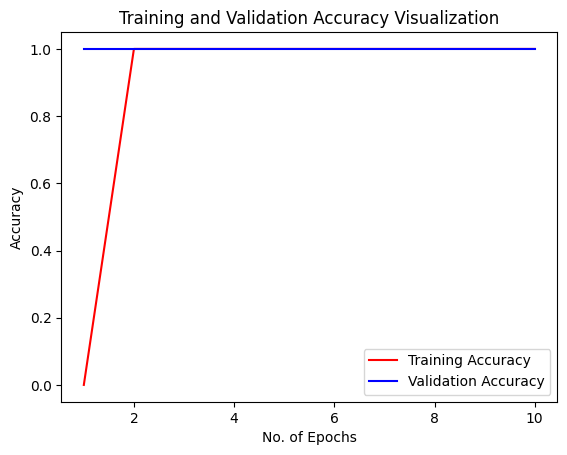

In [107]:
plt.plot(epochs, training_history.history["accuracy"], color="red", label="Training Accuracy")
plt.plot(epochs, training_history.history["val_accuracy"], color="blue", label="Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Visualization")
plt.legend()
plt.show()

## Other Model Evaluations

#### Precision, Recall, F1 Score

In [124]:
#we need class_name for performin precision, recall
class_name = validation_set.class_names
class_name

['Apple', 'Apple___Cedar_apple_rust', 'Banana']

In [125]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    #label_mode="categorical",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False, #the dir will be passed sequentially(top-bottom)
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 4 files belonging to 3 classes.


In [126]:
#preform prediction
y_pred = model.predict(test_set)
y_pred, y_pred.shape

#meaning
#for each file its giving probability of 3(each class)(2, 3))
#0. =>is the propability that it belongs to class 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


(array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 (4, 3))

In [127]:
#go inside y_pred and extract the max value return index axis=1(colum wise) axis=0(row wise)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 1, 1, 1])>

In [128]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [129]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 1, 2])>

In [130]:
#calc precision
from sklearn.metrics import classification_report
print(classification_report(Y_true, predicted_categories, target_names=class_name))


                          precision    recall  f1-score   support

                   Apple       0.00      0.00      0.00         1
Apple___Cedar_apple_rust       0.50      1.00      0.67         2
                  Banana       0.00      0.00      0.00         1

                accuracy                           0.50         4
               macro avg       0.17      0.33      0.22         4
            weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
